### Reading In Files 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker


In [29]:
df_trimester1=pd.read_csv(r"C:\Users\alaak\Downloads\inventory_semester_1.csv")
df_trimester2=pd.read_csv(r"C:\Users\alaak\Downloads\inventory_semester_2.csv")
df_trimester3=pd.read_csv(r"C:\Users\alaak\Downloads\inventory_semester_3.csv")
df_trimester4=pd.read_csv(r"C:\Users\alaak\Downloads\inventory_semester_4.csv")


### Check for Duplicates

In [30]:
print(df_trimester1.duplicated().sum())
print(df_trimester2.duplicated().sum())
print(df_trimester3.duplicated().sum())
print(df_trimester4.duplicated().sum())


146
176
151
137


### Remove Duplicates

In [31]:
df_trimester1=df_trimester1.drop_duplicates()
df_trimester2=df_trimester2.drop_duplicates()
df_trimester3=df_trimester3.drop_duplicates()
df_trimester4=df_trimester4.drop_duplicates()
print(df_trimester1.duplicated().sum())
print(df_trimester2.duplicated().sum())
print(df_trimester3.duplicated().sum())
print(df_trimester4.duplicated().sum())

0
0
0
0


### Merge The Data Frames

In [32]:
df=pd.concat([df_trimester1, df_trimester2, df_trimester3, df_trimester4], axis=0)

### Check the first few rows

In [33]:
df.head()

,product_id,product_name,category,weight_g,price,manufacturing_date,expiry_date,production_quantity,sold_quantity,returned_quantity,damaged_quantity
0,1,Yaourt Aromatisé Fraise 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,27334,21473,1581,3325
1,2,Yaourt Aromatisé Banane 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,97708,70302,8269,17423
2,3,Yaourt Aromatisé Vanille 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,22590,18523,unknown,1513
3,4,Yaourt Aromatisé Noix de coco 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,24547,17087,NaN,2772
4,5,Yaourt aux Fruits Pêche Abricot 100g,Yaourt aux Fruits,100,0.84,1/1/2024,1/31/2024,44527,34933,2880,6110


### Get the Summary of The DataFrame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10451 entries, 0 to 2717
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           10451 non-null  int64 
 1   product_name         10451 non-null  object
 2   category             10451 non-null  object
 3   weight_g             10451 non-null  int64 
 4   price                10451 non-null  object
 5   manufacturing_date   10451 non-null  object
 6   expiry_date          10451 non-null  object
 7   production_quantity  10451 non-null  int64 
 8   sold_quantity        9543 non-null   object
 9   returned_quantity    9789 non-null   object
 10  damaged_quantity     9621 non-null   object
dtypes: int64(3), object(8)
memory usage: 979.8+ KB


### Check the Nulls

In [35]:
print(df.isnull().sum())

product_id               0
product_name             0
category                 0
weight_g                 0
price                    0
manufacturing_date       0
expiry_date              0
production_quantity      0
sold_quantity          908
returned_quantity      662
damaged_quantity       830
dtype: int64


### Check the sold_quantity,returned_quantity,damaged_quantity Columns

In [36]:
print(df["sold_quantity"].value_counts(dropna=False))

sold_quantity
NaN        908
unknown    502
3143        15
3359        12
3412        12
          ... 
10173        1
17087        1
39950        1
6745         1
8535         1
Name: count, Length: 4840, dtype: int64


In [37]:
print(df["returned_quantity"].value_counts(dropna=False))


returned_quantity
NaN        662
unknown    260
144         32
176         28
197         28
          ... 
812          1
17485        1
2925         1
2330         1
11764        1
Name: count, Length: 2163, dtype: int64


In [38]:
print(df["damaged_quantity"].value_counts(dropna=False))

damaged_quantity
NaN        830
unknown    446
            87
225         18
162         17
          ... 
1725         1
2273         1
1027         1
3722         1
1537         1
Name: count, Length: 2839, dtype: int64


### Replace "unknown" with NaN

In [39]:
df_trimester1[["sold_quantity", "returned_quantity", "damaged_quantity"]] = df_trimester1[["sold_quantity", "returned_quantity", "damaged_quantity"]].replace(["unknown"," ",0], np.nan)
df_trimester2[["sold_quantity", "returned_quantity", "damaged_quantity"]] = df_trimester2[["sold_quantity", "returned_quantity", "damaged_quantity"]].replace(["unknown"," ",0], np.nan)
df_trimester3[["sold_quantity", "returned_quantity", "damaged_quantity"]] = df_trimester3[["sold_quantity", "returned_quantity", "damaged_quantity"]].replace(["unknown"," ",0], np.nan)
df_trimester4[["sold_quantity", "returned_quantity", "damaged_quantity"]] = df_trimester4[["sold_quantity", "returned_quantity", "damaged_quantity"]].replace(["unknown"," ",0], np.nan)
df[["sold_quantity", "returned_quantity", "damaged_quantity"]] = df[["sold_quantity", "returned_quantity", "damaged_quantity"]].replace(["unknown"," ",0], np.nan)

In [40]:
print(df["sold_quantity"].value_counts(dropna=False))

sold_quantity
NaN      1410
3143       15
3412       12
3359       12
3191       11
         ... 
17102       1
18843       1
49698       1
24650       1
3260        1
Name: count, Length: 4839, dtype: int64


In [41]:
print(df["returned_quantity"].value_counts(dropna=False))

returned_quantity
NaN      922
144       32
197       28
132       28
176       28
        ... 
8312       1
17214      1
4540       1
1124       1
1656       1
Name: count, Length: 2162, dtype: int64


In [42]:
print(df["damaged_quantity"].value_counts(dropna=False))

damaged_quantity
NaN      1363
225        18
162        17
164        17
598        16
         ... 
11126       1
4868        1
1486        1
3569        1
1465        1
Name: count, Length: 2837, dtype: int64


### Replace the NaN with the average value of the trimester for The column "production_quantity"

In [43]:
import numpy as np
import pandas as pd

# Columns to be filled
columns_to_fill = ['sold_quantity', 'returned_quantity', 'damaged_quantity']

for col in columns_to_fill:
    for trimester_df in [df_trimester1, df_trimester2, df_trimester3, df_trimester4 ,df]:
        # Ensure 'production_quantity' and the current column are numeric
        trimester_df['production_quantity'] = pd.to_numeric(trimester_df['production_quantity'], errors='coerce')
        trimester_df[col] = pd.to_numeric(trimester_df[col], errors='coerce')

        # Compute the mean ratio before replacing values
        ratio_mean = (trimester_df[col] / trimester_df['production_quantity']).mean(skipna=True)
        
        # Check for any zero production quantity to avoid division by zero
        if np.any(trimester_df['production_quantity'] == 0):
            print(f"Warning: Zero production quantities found in {col} for trimester.")

        # Replace NaN and 0 values with the computed ratio
        mask = (trimester_df[col].isna()) | (trimester_df[col] == 0)
        trimester_df.loc[mask, col] = (
            (trimester_df.loc[mask, 'production_quantity'] * ratio_mean).astype(int)
        )

        # Convert to integer after all replacements (if necessary)
        trimester_df[col] = trimester_df[col].astype(int)

# Checking value counts after replacements
print(df["sold_quantity"].value_counts(dropna=False))


sold_quantity
3143     15
3359     13
3036     12
3299     12
3412     12
         ..
18843     1
49698     1
24650     1
3260      1
11673     1
Name: count, Length: 5487, dtype: int64


### Create unsold product column

In [44]:
df['unsold_quantity'] = df['production_quantity'] - (df['damaged_quantity'] + df['returned_quantity'] + df['sold_quantity'])
df_trimester1['unsold_quantity'] = df_trimester1['production_quantity'] - (df_trimester1['damaged_quantity'] + df_trimester1['returned_quantity'] + df_trimester1['sold_quantity'])
df_trimester2['unsold_quantity'] = df_trimester2['production_quantity'] - (df_trimester2['damaged_quantity'] + df_trimester2['returned_quantity'] + df_trimester2['sold_quantity'])
df_trimester3['unsold_quantity'] = df_trimester3['production_quantity'] - (df_trimester3['damaged_quantity'] + df_trimester3['returned_quantity'] + df_trimester3['sold_quantity'])
df_trimester4['unsold_quantity'] = df_trimester4['production_quantity'] - (df_trimester4['damaged_quantity'] + df_trimester4['returned_quantity'] + df_trimester4['sold_quantity'])

### Check the new column

In [45]:
df.head()

,product_id,product_name,category,weight_g,price,manufacturing_date,expiry_date,production_quantity,sold_quantity,returned_quantity,damaged_quantity,unsold_quantity
0,1,Yaourt Aromatisé Fraise 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,27334,21473,1581,3325,955
1,2,Yaourt Aromatisé Banane 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,97708,70302,8269,17423,1714
2,3,Yaourt Aromatisé Vanille 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,22590,18523,1003,1513,1551
3,4,Yaourt Aromatisé Noix de coco 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,24547,17087,1090,2772,3598
4,5,Yaourt aux Fruits Pêche Abricot 100g,Yaourt aux Fruits,100,0.84,1/1/2024,1/31/2024,44527,34933,2880,6110,604


### Check the "product_name" values

In [46]:
df["product_name"].value_counts()

product_name
Grecos Fraise                                 395
Bifi Aromatisé Citron 0% 100g                 394
Yaourt aux Fruits Mixés Fraise 100g           393
Vitupti Fraise 100g                           389
Yaourt Nature 100g                            388
Yaourt aux Fruits Secs 100g                   388
Yaourt aux Fruits cerise et framboise 100g    387
Yaourt Brassé Biscuit-Vanille 70g             387
Grécos                                        386
Yaourt Brassé Pistache 70g                    385
Yaourt Brassé Tutti Frutti 70g                385
Grecos Nature Sucré                           384
Vitupti Vanille 100g                          384
Yaourt Brassé Vanille 70g                     383
Yaourt aux Fruits Pêche Abricot 100g          383
Yaourt aux Fruits Mixés Mangue 100g           382
Yaourt Brassé Fraise Banane 70g               379
Vit'up Max Vanille 260g                       348
Vit'up Max Fraise 260g                        347
Vit'up Fraise 160g                   

### Fix incorrect Syntax 

In [47]:
print(df.columns[df.columns.duplicated()])  # Check duplicate columns
print(df_trimester1.columns[df_trimester1.columns.duplicated()])

Index([], dtype='object')
Index([], dtype='object')


In [48]:
df_trimester1.head()

,product_id,product_name,category,weight_g,price,manufacturing_date,expiry_date,production_quantity,sold_quantity,returned_quantity,damaged_quantity,unsold_quantity
0,1,Yaourt Aromatisé Fraise 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,27334,21473,1581,3325,955
1,2,Yaourt Aromatisé Banane 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,97708,70302,8269,17423,1714
2,3,Yaourt Aromatisé Vanille 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,22590,18523,993,1513,1561
3,4,Yaourt Aromatisé Noix de coco 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,24547,17087,1079,2772,3609
4,5,Yaourt aux Fruits Pêche Abricot 100g,Yaourt aux Fruits,100,0.84,1/1/2024,1/31/2024,44527,34933,2880,6110,604


In [49]:
corrections = {
    "Yaourt Brassé Fraise Ba@ane 70g": "Yaourt Brassé Fraise Banane 70g",
    "Vit'up Max@Vanille 260g": "Vit'up Max Vanille 260g",
    "Yaourt aux Fruits Secs @00g": "Yaourt aux Fruits Secs 100g",
    "Yaourt aux Fruits Mixés Mangue 10@g": "Yaourt aux Fruits Mixés Mangue 100g",
    "Yaou@t aux Fruits Pêche Abricot 100g": "Yaourt aux Fruits Pêche Abricot 100g",
    "Yaourt Brassé @iscuit-Vanille 70g": "Yaourt Brassé Biscuit-Vanille 70g",
    "Yaourt Aromatisé@Vanille 100g": "Yaourt Aromatisé Vanille 100g",
    "Grecos Nature Su@ré": "Grecos Nature Sucré",
    "Vitupti Frais@ 100g": "Vitupti Fraise 100g",
    "Yaourt aux Fruits Pêche Abricot 10@g": "Yaourt aux Fruits Pêche Abricot 100g",
    "Yaourt Aromatise Fraise 100g": "Yaourt Aromatisé Fraise 100g",
    "Yaourt Aromatise Vanille 100g": "Yaourt Aromatisé Vanille 100g",
    "Yaourt Aromatise Noix de coco 100g": "Yaourt Aromatisé Noix de coco 100g",
    "Yaourt Aromatise Banane 100g": "Yaourt Aromatisé Banane 100g",
    "vitup Vanille 160g": "Vit'up Vanille 160g",
    "vitup Max Vanille 260g": "Vit'up Max Vanille 260g",
    "vitup Pinacolada 160g": "Vit'up Pinacolada 160g",
    "vitup Pinacolada 260g": "Vit'up Pinacolada 260g",
    "vitup Fraise 160g": "Vit'up Fraise 160g",
    "vitup Max Fraise 260g": "Vit'up Max Fraise 260g"
}
df["product_name"] = df["product_name"].replace(corrections)
df_trimester1["product_name"] = df_trimester1["product_name"].replace(corrections)
df_trimester2["product_name"] = df_trimester2["product_name"].replace(corrections)
df_trimester3["product_name"] = df_trimester3["product_name"].replace(corrections)
df_trimester4["product_name"] = df_trimester4["product_name"].replace(corrections)


In [50]:
df["product_name"].value_counts()

product_name
Yaourt Aromatisé Fraise 100g                  395
Yaourt Aromatisé Banane 100g                  395
Grecos Fraise                                 395
Vit'up Max Vanille 260g                       394
Bifi Aromatisé Citron 0% 100g                 394
Yaourt aux Fruits Mixés Fraise 100g           393
Vit'up Vanille 160g                           391
Vitupti Fraise 100g                           390
Yaourt aux Fruits Secs 100g                   389
Yaourt Brassé Biscuit-Vanille 70g             388
Yaourt Nature 100g                            388
Yaourt aux Fruits cerise et framboise 100g    387
Vit'up Pinacolada 160g                        386
Grécos                                        386
Yaourt Brassé Tutti Frutti 70g                385
Grecos Nature Sucré                           385
Yaourt Brassé Pistache 70g                    385
Yaourt aux Fruits Pêche Abricot 100g          385
Yaourt Aromatisé Vanille 100g                 384
Vitupti Vanille 100g                 

### Remove Erroneous Values

After visiting the factory and gathering information on how the production machines operate, we found that for the most common yogurt type, there are four machines, each with a maximum production capacity of 80,000 units. Therefore, we must remove any production line with a quantity exceeding 360,000 units.

In [51]:
df_trimester1.head()


,product_id,product_name,category,weight_g,price,manufacturing_date,expiry_date,production_quantity,sold_quantity,returned_quantity,damaged_quantity,unsold_quantity
0,1,Yaourt Aromatisé Fraise 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,27334,21473,1581,3325,955
1,2,Yaourt Aromatisé Banane 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,97708,70302,8269,17423,1714
2,3,Yaourt Aromatisé Vanille 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,22590,18523,993,1513,1561
3,4,Yaourt Aromatisé Noix de coco 100g,Yaourt Aromatisé,100,0.54,1/1/2024,1/31/2024,24547,17087,1079,2772,3609
4,5,Yaourt aux Fruits Pêche Abricot 100g,Yaourt aux Fruits,100,0.84,1/1/2024,1/31/2024,44527,34933,2880,6110,604


In [52]:
df.describe()

,product_id,weight_g,production_quantity,sold_quantity,returned_quantity,damaged_quantity,unsold_quantity
count,10451.000000,10451.000000,1.045100e+04,1.045100e+04,10451.000000,10451.000000,10451.000000
mean,4916.217491,118.871878,1.742163e+04,1.314593e+04,785.456607,1448.414697,2041.826524
std,2841.213650,55.200721,6.388511e+04,5.520504e+04,1854.568524,3295.934602,7707.703271
min,1.000000,70.000000,3.601000e+03,2.529000e+03,1.000000,1.000000,-1.000000
25%,2452.500000,100.000000,4.644500e+03,3.290000e+03,158.000000,316.000000,476.000000
50%,4910.000000,100.000000,6.457000e+03,3.851000e+03,292.000000,556.000000,1173.000000
75%,7372.500000,100.000000,1.696750e+04,1.239550e+04,614.000000,1156.000000,2267.000000
max,9855.000000,260.000000,4.175700e+06,3.883401e+06,30354.000000,66280.000000,473123.000000


C:\Users\alaak\AppData\Local\Temp\ipykernel_7400\891365420.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x="Trimester", y="Total Sales", data=df_sales, palette="coolwarm")


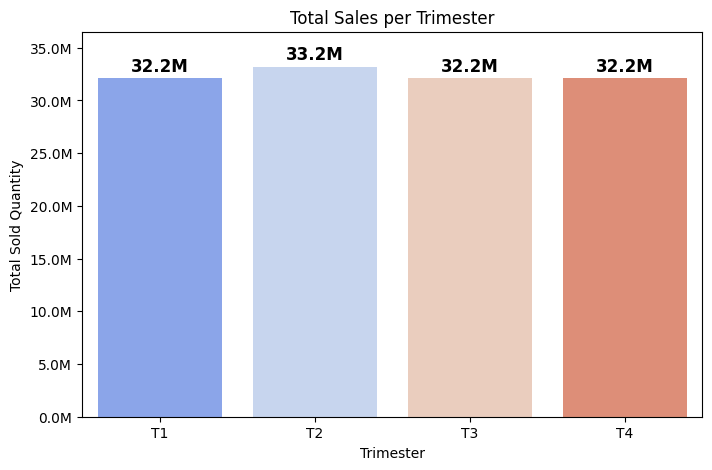

In [68]:
sales_data = {
    "Trimester": ["T1", "T2", "T3", "T4"],
    "Total Sales": [
        df_trimester1['sold_quantity'].sum(),
        df_trimester2['sold_quantity'].sum(),
        df_trimester1['sold_quantity'].sum(),
        df_trimester1['sold_quantity'].sum()
    ]
}

# Convert to DataFrame
df_sales = pd.DataFrame(sales_data)

# Plot the trimester sales

plt.figure(figsize=(8,5))
ax =sns.barplot(x="Trimester", y="Total Sales", data=df_sales, palette="coolwarm")
max_sales = df_sales["Total Sales"].max()
plt.ylim(0, max_sales * 1.1) 
# Labels and title
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
for i, value in enumerate(df_sales["Total Sales"]):
    ax.text(i, value + (value * 0.02), f'{value/1e6:.1f}M', ha='center', fontsize=12, fontweight='bold', color='black')

plt.xlabel("Trimester")
plt.ylabel("Total Sold Quantity")
plt.title("Total Sales per Trimester")

# Show the plot
plt.show()

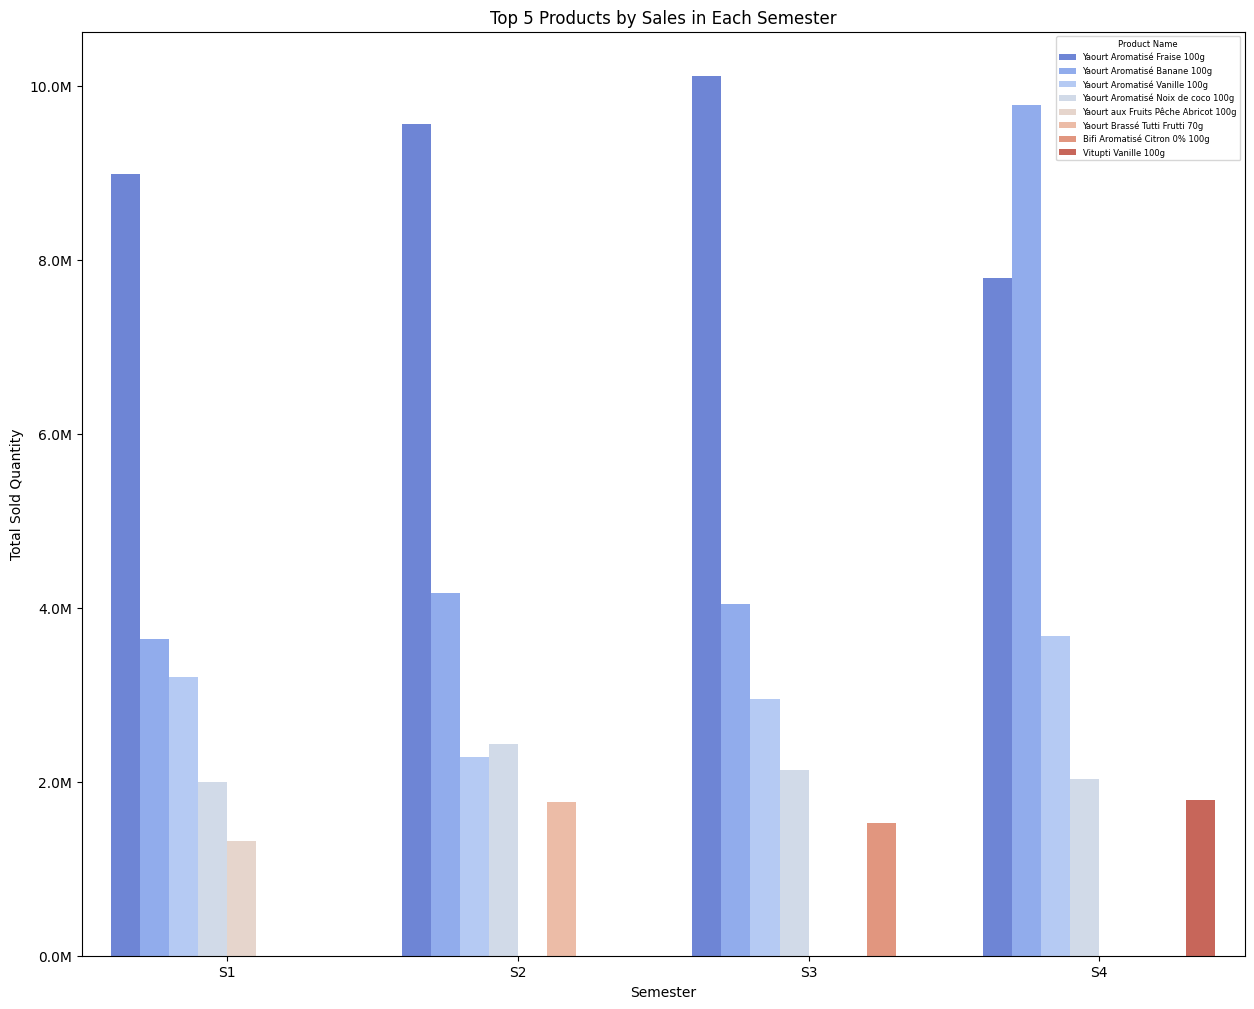

In [117]:
def get_top5(df, semester_name):
    top5 = df.groupby("product_name")["sold_quantity"].sum().nlargest(5).reset_index()
    top5["Semester"] = semester_name  # Add semester name column
    return top5

# Get top 3 products from each semester
df_top5_s1 = get_top5(df_trimester1, "S1")
df_top5_s2 = get_top5(df_trimester2, "S2")
df_top5_s3 = get_top5(df_trimester3, "S3")
df_top5_s4 = get_top5(df_trimester4, "S4")

# Combine data into one DataFrame
df_top5 = pd.concat([df_top5_s1, df_top5_s2, df_top5_s3, df_top5_s4])
max_product=df_top5['sold_quantity'].max()
min_product=df_top5['sold_quantity'].min()
# Plot
plt.figure(figsize=(15,12))
ax = sns.barplot(x="Semester", y="sold_quantity", hue="product_name", data=df_top5, palette="coolwarm")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Labels and title
plt.xlabel("Semester")
plt.ylabel("Total Sold Quantity")
plt.title("Top 5 Products by Sales in Each Semester")
# Show values on top of bars
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height()):,}', 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.legend(title="Product Name", loc="upper right", bbox_to_anchor=(1, 1), fontsize=6, title_fontsize=6)
plt.show()


,product_name,sold_quantity,Semester
0,Yaourt Aromatisé Fraise 100g,8991556,S1
1,Yaourt Aromatisé Banane 100g,3645579,S1
2,Yaourt Aromatisé Vanille 100g,3202043,S1
0,Yaourt Aromatisé Fraise 100g,9568213,S2
1,Yaourt Aromatisé Banane 100g,4174542,S2
2,Yaourt Aromatisé Noix de coco 100g,2440526,S2
0,Yaourt Aromatisé Fraise 100g,10122135,S3
1,Yaourt Aromatisé Banane 100g,4043940,S3
2,Yaourt Aromatisé Vanille 100g,2954095,S3
0,Yaourt Aromatisé Banane 100g,9781223,S4


C:\Users\alaak\AppData\Local\Temp\ipykernel_7400\2075661106.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="product_name", y="sales_per_quantity", data=df_top5_products, palette="coolwarm")


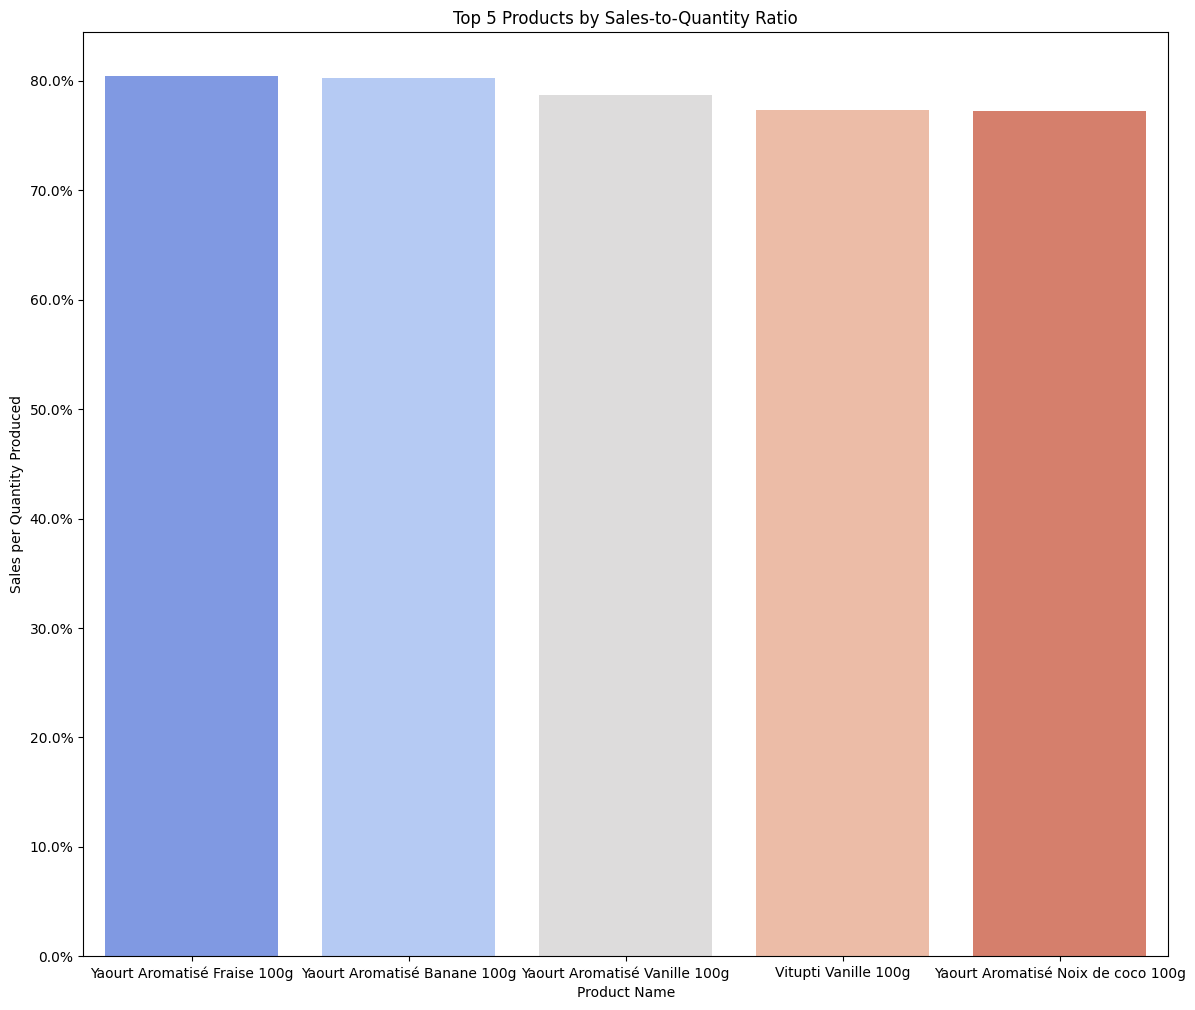

In [120]:
df_product_sales = df.groupby("product_name").agg(
    total_sales=('sold_quantity', 'sum'),
    total_produced=('production_quantity', 'sum')
).reset_index()

df_product_sales['sales_per_quantity'] = df_product_sales['total_sales'] / df_product_sales['total_produced']
df_top5_products = df_product_sales.nlargest(5, "sales_per_quantity")
maxp=df_product_sales['sales_per_quantity'].max()
minp=df_product_sales['sales_per_quantity'].min()
plt.figure(figsize=(14,12))
ax = sns.barplot(x="product_name", y="sales_per_quantity", data=df_top5_products, palette="coolwarm")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
plt.xlabel("Product Name")
plt.ylabel("Sales per Quantity Produced")
plt.title("Top 5 Products by Sales-to-Quantity Ratio")
plt.show()